Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2017/2018  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 30. listopada 2017.*

(c) 2015-2017 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. listopada 2017.**  
Rok za predaju: **6. studenog 2017. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_2d_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [17]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Accuracy: 1.0


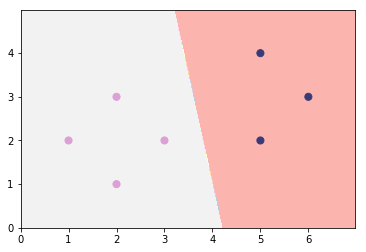

In [5]:
clf = RidgeClassifier(alpha=0)
model = clf.fit(seven_X, seven_y)
h = model.predict(seven_X)

score = accuracy_score(seven_y, h)
print ("Accuracy: {}".format(score))

mlutils.plot_2d_clf_problem(seven_X, seven_y, model.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

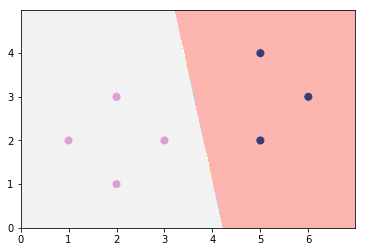

In [18]:
clf = LinearRegression()
model = clf.fit(seven_X, seven_y)

h = lambda x: model.predict(x) >= 0.5

mlutils.plot_2d_clf_problem(seven_X, seven_y, h)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [19]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Accuracy: 0.875


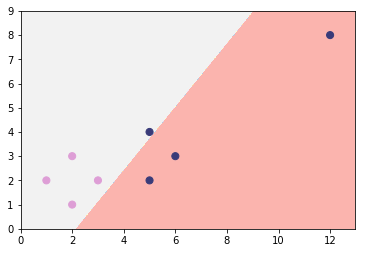

In [24]:
mlutils.plot_2d_clf_problem(outlier_X, outlier_y)

clf = RidgeClassifier(alpha=0)
model = clf.fit(outlier_X, outlier_y)
h = model.predict(outlier_X)

score = accuracy_score(outlier_y, h)
print ("Accuracy: {}".format(score))

mlutils.plot_2d_clf_problem(outlier_X, outlier_y, model.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [25]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Accuracy: 0.875


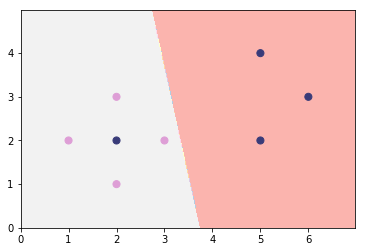

In [10]:
mlutils.plot_2d_clf_problem(unsep_X, unsep_y)

clf = RidgeClassifier(alpha=0)
model = clf.fit(unsep_X, unsep_y)
h = model.predict(unsep_X)

score = accuracy_score(unsep_y, h)
print ("Accuracy: {}".format(score))

mlutils.plot_2d_clf_problem(unsep_X, unsep_y, model.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

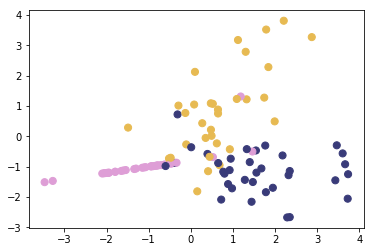

In [13]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=3)
mlutils.plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

Text(0.5,1,u'$RidgeClassifier$')

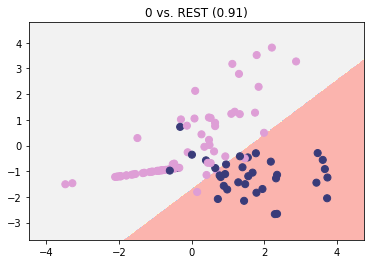

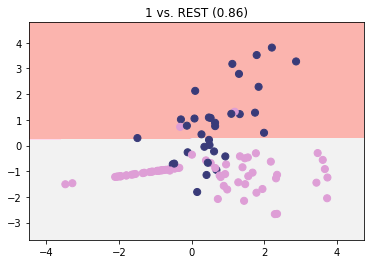

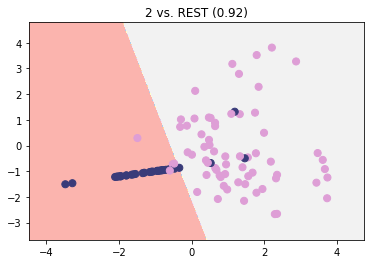

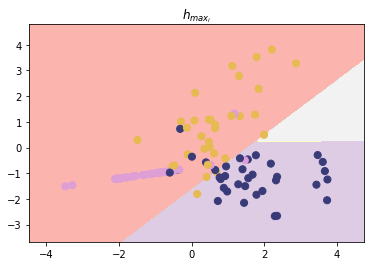

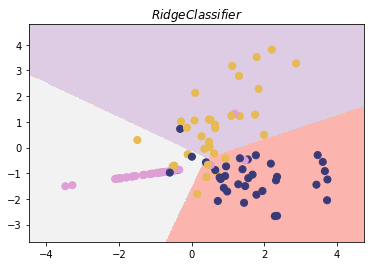

In [14]:
import itertools


scores = []
models = []

for i in range(max(y) + 1):
    clf = RidgeClassifier(alpha=0)
    yi = [0 if c == i else 1 for c in y]
    models.append(clf.fit(X, yi))
    plt.figure(i)
    mlutils.plot_2d_clf_problem(X, yi, models[-1].predict)
    
    h = models[-1].predict(X)
    score = accuracy_score(yi, h)
    scores.append(score)
    plt.title('{} vs. REST ({})'.format(i, score))

plt.figure(3)
mlutils.plot_2d_clf_problem(X, y, lambda x: np.argmax([model.predict(x.reshape(1, -1)) for model in models]))
plt.title('$h_{max_{i}}$')

clf = RidgeClassifier(alpha = 0)
model = clf.fit(X, y)
plt.figure(4)
mlutils.plot_2d_clf_problem(X, y, clf.predict)
plt.title('$RidgeClassifier$')

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

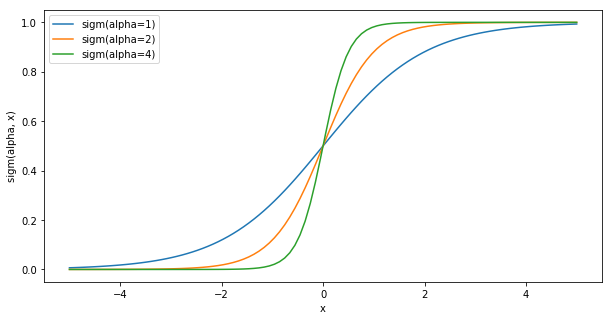

In [52]:
def sigm(alpha, x):
    return 1 / (1 + math.exp(-alpha * x))

alphas = (1, 2, 4)

for alpha in alphas:
    x = np.linspace(-5, 5, 100)
    plt.figure(figsize=(10, 5))
    plt.figure(1)
    plt.plot(x, [sigm(alpha, x_) for x_ in x])
    plt.xlabel('x'), plt.ylabel('sigm(alpha, x)')

legend_list = ['sigm(alpha={})'.format(i) for i in alphas]
plt.legend(legend_list, loc='best')

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [53]:
from sklearn.preprocessing import PolynomialFeatures

def lr_H(X, w):
    X_ = PolynomialFeatures(1).fit_transform(X.reshape(-1, 2))
    return np.array([sigm(0.5, h) for h in np.dot(X_, w)])

def cross_entropy_error(X, y, w):
    return 1 / X.shape[0] * (np.dot(-y, np.log(lr_H(X, w))) - np.dot((1 - y), np.log(1 - lr_H(X, w))))

def batch(data, lwr, upp):
    if upp <= lwr:
        return np.concatenate((data[lwr:], data[:upp]), axis=0)
    else:
        return data[lwr:upp]

def lr_train(X, y, eta=0.01, max_iter=2000, batch_size=5, alpha=0, epsilon=0.001, trace=False):
    N = X.shape[0]
    
    if (batch_size > N):
        raise ValueError('Batch size should be smaller than dataset size!')
    
    W = [np.zeros(X.shape[1] + 1)]
    lwr_idx = 0
    upp_idx = batch_size
    
    for i in range(max_iter):
        batch_X = batch(X, lwr_idx, upp_idx)
        batch_y = batch(y, lwr_idx, upp_idx)
        
        h = lr_H(batch_X, W[-1])
        
        dL_ds = h - batch_y
        dw_ds = np.dot(dL_ds.T, batch_X)
        
        w0 = W[i][0] - eta * np.sum(dL_ds)
        w = W[i][1:] - eta * (dw_ds + alpha / 2 * W[i][1:])
        
        error = cross_entropy_error(batch_X, batch_y, W[-1])
        if abs(error) < epsilon:
            return W if trace else W[-1]
        
        W.append(np.append([w0], w))
        lwr_idx = (lwr_idx + batch_size) % N
        upp_idx = (upp_idx + batch_size) % N
    
    return np.array(W) if trace else W[-1]

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

Cross entropy error: 0.16328644364648925


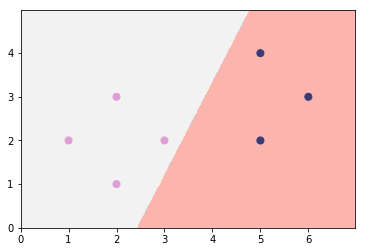

In [182]:
w = lr_train(seven_X, seven_y)

print('Cross entropy error: {}'.format(cross_entropy_error(seven_X, seven_y, w)))

mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_H(x, w) > 0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

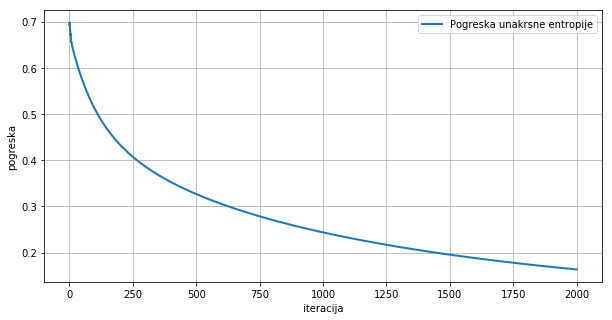

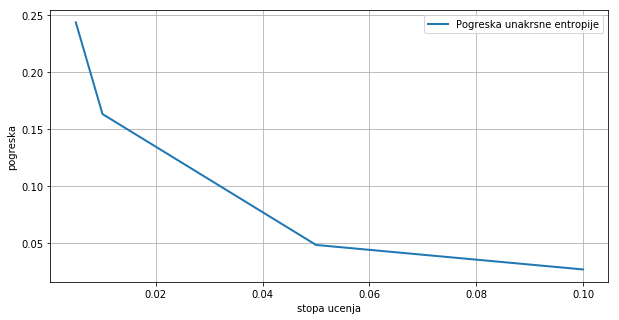

In [181]:
def plot(x, y, flabel, xlabel, ylabel):
    plt.figure(figsize=(10,5))
    plt.grid()
    plt.plot(x, y, linewidth = 2, label = flabel)
    plt.xlabel(xlabel), plt.ylabel(ylabel)
    plt.legend(loc = 'best')

W = lr_train(seven_X, seven_y, trace=True)
errors = []
for w in W:
    errors.append(cross_entropy_error(seven_X, seven_y, w))

plt.figure(1)
plot(range(len(W)), errors, 'Pogreska unakrsne entropije', 'iteracija', 'pogreska')

etas = (0.005, 0.01, 0.05, 0.1)
errors = []
for eta in etas:
    w = lr_train(seven_X, seven_y, eta=eta)
    errors.append(cross_entropy_error(seven_X, seven_y, w))
    
plt.figure(2)
plot(etas, errors, 'Pogreska unakrsne entropije', 'stopa ucenja', 'pogreska')


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

Pogreska unakrsne entropije: 0.33949406547378097
Tocnost klasifikacije: 1.0


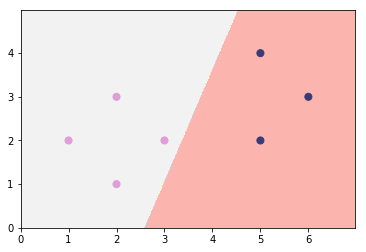

In [180]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=10)
model = clf.fit(seven_X, seven_y)

w = np.concatenate((model.intercept_.reshape(1, 1), model.coef_.T))
print ('Pogreska unakrsne entropije: {}'.format(cross_entropy_error(seven_X, seven_y, w)))

h = model.predict(seven_X)
print ('Tocnost klasifikacije: {}'.format(accuracy_score(seven_y, h)))

mlutils.plot_2d_clf_problem(seven_X, seven_y, model.predict)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

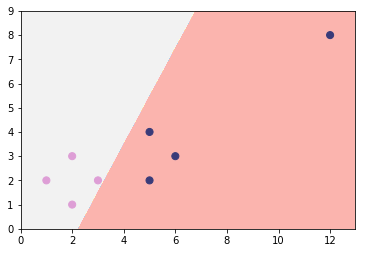

In [179]:
clf = LogisticRegression(C=5)
model = clf.fit(outlier_X, outlier_y)

mlutils.plot_2d_clf_problem(outlier_X, outlier_y, model.predict)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


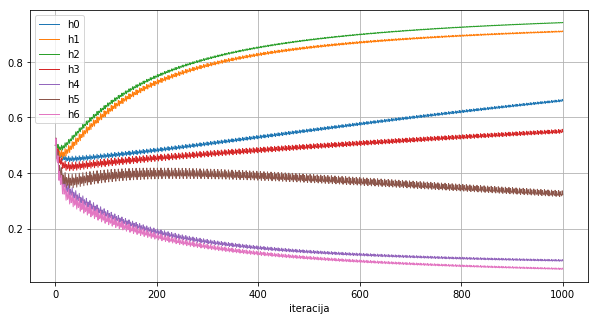

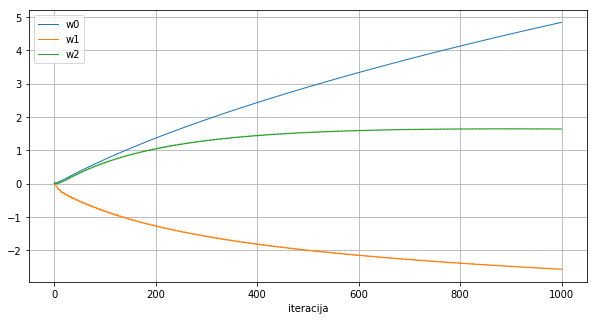

In [178]:
def plot_multiple(x, Y, plt_idx, flabel):
    plt.figure(figsize=(10,5))
    for i, column in enumerate(Y.T):
        plt.figure(plt_idx)
        plt.grid()
        plt.plot(x, column, linewidth = 1, label = '{}{}'.format(flabel, i))
    plt.xlabel('iteracija')
    plt.legend(loc = 'best')

def plot_dataset(X, y, max_iter=2000):
    W = lr_train(X, y, max_iter=1000, trace=True)

    H = []
    for w in W:
        hs = []
        for x in seven_X:
            hs.append(lr_H(x, w))
        H.append(hs)

    H = np.array(H).reshape(len(W), 7)

    plot_multiple(range(H.shape[0]), np.array(H), 1, 'h')
    plot_multiple(range(len(W)), np.array(W), 2, 'w')

plot_dataset(seven_X, seven_y)

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

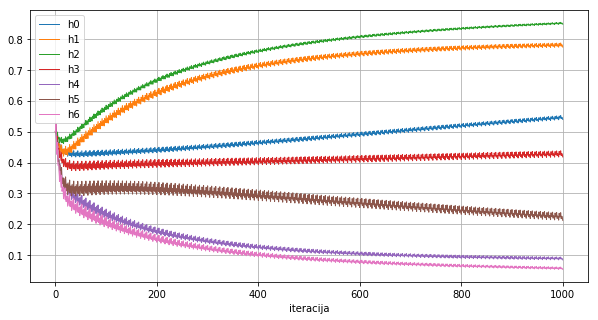

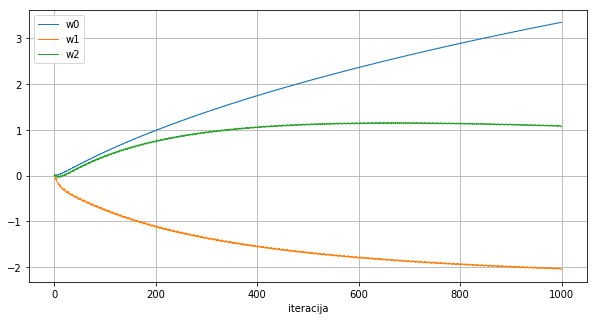

In [133]:
plot_dataset(unsep_X, unsep_y)

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [ ]:
from numpy.linalg import norm

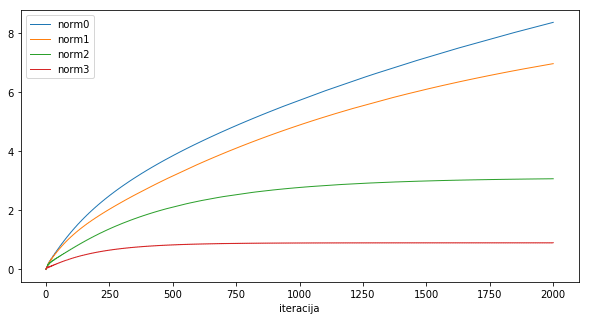

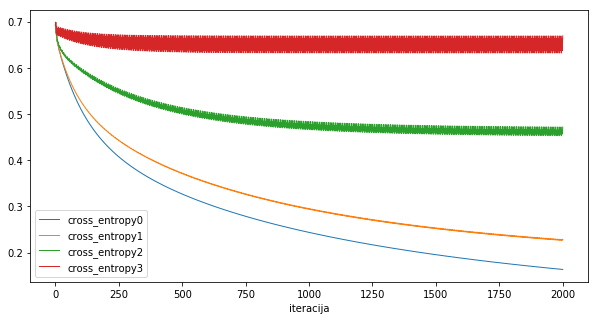

In [177]:
error_matrix, l2_norm_matrix = [], []

alphas = (0, 1, 10, 100)
for alpha in alphas:
    W = lr_train(seven_X, seven_y, alpha=alpha, trace=True)
    errors, l2_norms = [], []
    for w in W:
        errors.append(cross_entropy_error(seven_X, seven_y, w))
        l2_norms.append(norm(w, ord=2))
    error_matrix.append(errors)
    l2_norm_matrix.append(l2_norms)
    
plot_multiple(range(len(l2_norm_matrix[0])), np.array(l2_norm_matrix).T, 1, 'norm')
plot_multiple(range(len(error_matrix[0])), np.array(error_matrix).T, 2, 'cross_entropy')

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

Accuracy #1: 0.94
Accuracy #2: 0.95


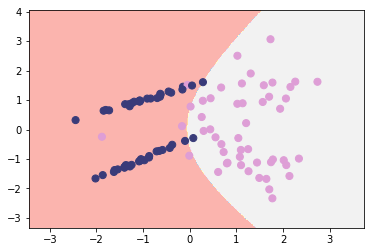

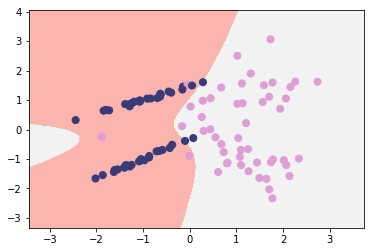

In [243]:
from sklearn.preprocessing import PolynomialFeatures

X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, n_classes=2)
ds = (2, 3)
#cs = (0.1, 1, 10, 100)

#for (j, c) in enumerate(cs):
for (i, d) in enumerate(ds):
    poly = PolynomialFeatures(d)
    X_ = poly.fit_transform(X)

    clf = LogisticRegression(C=1)
    model = clf.fit(poly.fit_transform(X), y)
    plt.figure(i + 1)
    mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.fit_transform(x)))

    h = model.predict(X_)
    print ('Accuracy #{}: {}'.format(i + 1, accuracy_score(y, h)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?